In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Loading Data Set
Three sets are created: training, validation, and test. 
- Labels are generated based on the folder structure.
- Loading in batches, of size 32, to reduce memory usage.
- Label mode is set to categorical, which means that the labels are encoded as a categorical vector.


The image load documentation is available [here](https://keras.io/api/data_loading/image/).

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='baseline_training_set/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='baseline_training_set/validation/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))
test_ds = keras.utils.image_dataset_from_directory(
    directory='baseline_training_set/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

Found 22320 files belonging to 15 classes.
Found 2790 files belonging to 15 classes.
Found 2790 files belonging to 15 classes.


# Visualizing the Data

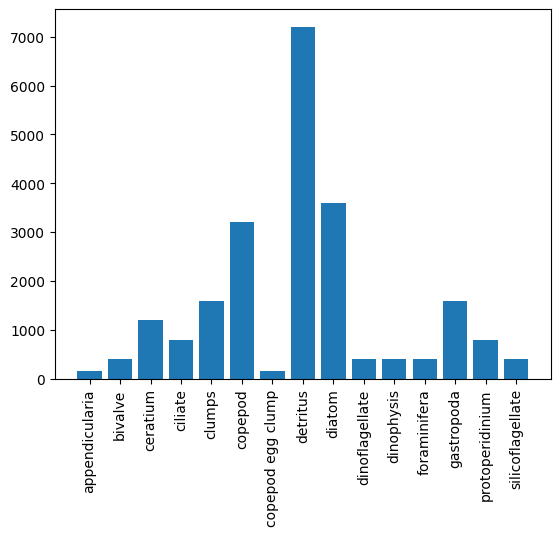

In [3]:
# histogram of class distribution in the data set
# remove underscores from class names
class_names = train_ds.class_names
class_names = [name.replace('_', ' ') for name in class_names]
class_counts = [0]*len(class_names)

# get the number of samples in each class
for images, labels in train_ds:
    for i in range(len(labels)):
        class_counts[np.argmax(labels[i])] += 1
# plot the histogram
plt.bar(class_names, class_counts)
plt.xticks(rotation=90)
plt.show()


In [5]:
base_model = tf.keras.applications.ResNet50(
    include_top=False, # do not include the classification layer
    weights="imagenet", # load pre-trained weights
    input_shape=(256, 256, 3) # specify input shape
)

In [ ]:
base_model.trainable = False # freeze the base model, i.e., prevent initial weights from being updated